In [45]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from math import log
# data = pd.read_csv(r'database_valid.csv', encoding = 'latin-1', sep = ';')
data = pd.read_csv("https://covid-nma.com/dataviz/data/database_valid.csv", sep = ";",encoding='latin-1').drop(index = [0])

df = pd.DataFrame(data)
# print(df)

In [46]:
trials_tmp1 = df.loc[df['Pharmacological treatment'] == 'Pharmacological treatment']
trials_tmp2 = df.loc[df['Pharmacological treatment'] == 'Non pharmacological treatment']
trials_tmp3 = df.loc[df['Pharmacological treatment'] == 'Biological treatment']
merge_tmp = [trials_tmp1, trials_tmp2, trials_tmp3]
trials = pd.concat(merge_tmp)
trials = trials[['Trial ID', 'Treatment name', 'Treatment type', 'Pharmacological treatment' , 'n randomized in this arm']]
# print(trials)

In [47]:
treatments_type = trials['Treatment type'].tolist()

# print(treatments_type) 
# still need to extract the first (=main) type of 
# intervention out of combinations

In [48]:
treatments_type_unique = []
for t in treatments_type : 
    if '+' in t :
        treatments_type_unique.append(t.split('+')[0])
    else : 
        treatments_type_unique.append(t)
treatments_type_unique = list(set(treatments_type_unique))
# print(treatments_type_unique)

In [49]:
types = trials['Treatment type'].tolist()[1:]
types_unique = []
for t in types : 
    if '+' in t :
        types_unique.append(t.split('+')[0])
    else : 
        types_unique.append(t)
types_unique = list(set(types_unique))
print(types_unique)


['RNA based vaccine', 'Calcium channel blocker', 'Medical device', 'Other antimicrobials', 'Anti-anemia', 'Smocking cessation agents', 'Immunomodulator', 'Retinoid', 'Complement inhibitor', 'Respiratory stimulant', 'Antipyretics', 'Lung surfactant', 'Monoclonal antibodies', 'Vasodilator', 'Hormonal therapy', 'Standard of care', 'Other antimicrobial', 'Olfactory training', 'ATMP', 'Antidepressant', 'Antihistamine', 'Diuretic', 'Rehabilitation', 'Education', 'Antineoplastic', 'Microbiota intervention', 'Narcotic analgesics', 'Anesthetic', 'Selective inhibitor of nuclear export', 'Immunosuppressant', 'Anticoagulant', 'Immunostimulant', 'Nucleoside reverse transcriptase inhibitors', 'Thrombolytic', 'VEGF inhibitor', 'Gas inhalation', 'Antivirals', 'Cardio protective', 'Radiation therapy', 'Lysine-specific histone demethylase inhibitor', 'Protease inhibitor', 'Nutrition', 'Antifungal', 'Life support', 'Care protocol', 'Kinase inhibitor', 'CETP inhibitor', 'Antidiabetic', 'Social distancing'

In [50]:
trials_list = trials.values.tolist()
# print(trials_list)
comparisons = [[0 for i in range(len(types_unique)+1)] for i in range(len(types_unique))]
comparisons_nb = [[0 for i in range(len(types_unique)+1)] for i in range(len(types_unique))]
# print(comparisons)

In [51]:
for i in range(len(types_unique)):
    comparisons[i][0] = types_unique[i]
    comparisons_nb[i][0] = types_unique[i]
# print(comparisons)


In [52]:
for i in range(len(trials_list)):
# for t in trials_list :
    # print(t)
    trial_id_1, name_1, type_vaccine_1, nb_1 = trials_list[i][0], trials_list[i][1].lower(), trials_list[i][2], trials_list[i][4]
    index_list1, index_list2 = 0, 0
    for u in trials_list[i+1:]:
        if u[0] == trial_id_1:
            type_vaccine_2, name_2, nb_2 = u[2], u[1].lower(), u[4]
            for v in range(len(types_unique)):
                if type_vaccine_1 == types_unique[v] :
                    index_list1 = v
                if type_vaccine_2 == types_unique[v] :
                    index_list2 = v
        if index_list1 != 0 and index_list2 != 0 and name_1 != name_2:
            comparisons[index_list1][index_list2] += 1
            comparisons[index_list2][index_list1] += 1
            comparisons_nb[index_list1][index_list2] += float(nb_1)
            comparisons_nb[index_list2][index_list1] += float(nb_2)

            

In [53]:
# print(comparisons_nb)

[[-0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, 8.071218539969863, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7], [-0.7, 8.130942302231878, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7], [-0.7, -0.7, 10.676646671065457, -0.7, -0.7, 8.457867725331422, -0.7, -0.7, -0.7, -0.7, -0.7, 8.65259782842244, -0.7, 7.941295570906532, -0.7, -0.7, -0.7, 7.52940645

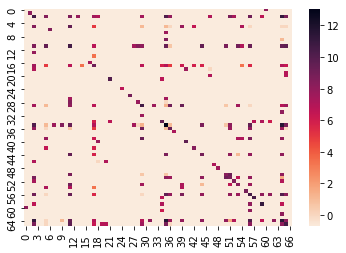

In [54]:
for t in comparisons:
   t.pop(0)
for t in comparisons_nb:
   t.pop(0)
comparisons.pop(0)
comparisons_nb.pop(0)
log_comparisons = []
for t in comparisons:
    tmp= []
    for u in t:
        if u != 0 :
            tmp.append(log(u))
        else :
            tmp.append(-0.7)
    log_comparisons.append(tmp)

print(log_comparisons)
cmap = sb.cm.rocket_r
heatmap_test = sb.heatmap(log_comparisons,cmap = cmap)
# heatmap_test_nb = sb.heatmap(comparisons_nb,cmap = cmap)
fig = heatmap_test.get_figure()
# fig1 = heatmap_test_nb.get_figure()
fig.savefig('Test_fig_heatmap.png')
# fig1.savefig('Test_fig_heatmap_nb.png')

In [68]:
# Input the name of the first treatment type you want to study
type_1, type_2 = input('What is the first type of treatment that should be studied ?'), input('What is the second type of treatment that should be studied ?')
if type_1 != type_2:
    different = True
    trials_of_type_1 = trials.loc[trials['Treatment type'] == 'Other antimicrobials']
    trials_of_type_2 = trials.loc[trials['Treatment type'] == 'Other antimicrobials']
    trials_slashed = pd.concat([trials_of_type_1, trials_of_type_2])
    print(trials_of_type_1) # debugging
    treatment_names_1 = trials_of_type_1['Treatment name'].tolist()
    # print(treatment_names_1)
    treatment_names_2 = trials_of_type_2['Treatment name'].tolist()
    treatment_names_1 = list(set(treatment_names_1))
    treatment_names_2 = list(set(treatment_names_2))
else:
    different = False
    trials_slashed = trials.loc[trials['Treatment type'] == type_1]
    treatment_names_1 = list(set(trials_slashed['Treatment name'].tolist()))    
    print(treatment_names_1)


['Pyronaridine artesunate', 'Hydroxychloroquine', 'Ivermectin', 'Hydroxychloroquine\xa0', 'Artesunate', 'Atovaquone', 'Azithromycin', 'Artemether lumefantrine', 'Chloroquine', 'Alexoquine', 'Artesunate-amodiaquine', 'Artemisinin-piperaquine', 'Tafenoquine', 'Artemisinin', 'GNS561', 'Mefloquine']


In [69]:
trials_slashed_list = trials_slashed.values.tolist()
print(trials_slashed_list)
if not different:
    treatment_names_2 = treatment_names_1
comparisons_slashed = [[0 for i in range(len(treatment_names_2))] for i in range(len(treatment_names_1))]
comparisons_slashed_nb = [[0 for i in range(len(treatment_names_2))] for i in range(len(treatment_names_1))]
# print(comparisons)

[[4.0, 'Hydroxychloroquine', 'Antimalaria', 'Pharmacological treatment', '50'], [23.0, 'Hydroxychloroquine', 'Antimalaria', 'Pharmacological treatment', '15'], [34.0, 'Chloroquine', 'Antimalaria', 'Pharmacological treatment', '40'], [71.0, 'Hydroxychloroquine', 'Antimalaria', 'Pharmacological treatment', '40'], [71.0, 'Chloroquine', 'Antimalaria', 'Pharmacological treatment', '40'], [81.0, 'Chloroquine', 'Antimalaria', 'Pharmacological treatment', '40'], [81.0, 'Hydroxychloroquine', 'Antimalaria', 'Pharmacological treatment', '40'], [83.0, 'Chloroquine', 'Antimalaria', 'Pharmacological treatment', '40'], [86.0, 'Chloroquine', 'Antimalaria', 'Pharmacological treatment', '50'], [87.0, 'Hydroxychloroquine', 'Antimalaria', 'Pharmacological treatment', '50'], [87.0, 'Chloroquine', 'Antimalaria', 'Pharmacological treatment', '50'], [88.0, 'Hydroxychloroquine', 'Antimalaria', 'Pharmacological treatment', '50'], [88.0, 'Chloroquine', 'Antimalaria', 'Pharmacological treatment', '50'], [89.0, 'H

In [74]:
if different:
    for i in range(len(trials_slashed_list)):
        trial_id_1, name_1, type_vaccine_1, nb_1 = trials_list[i][0], trials_list[i][1].lower(), trials_list[i][2], trials_list[i][4]
        for u in trials_slashed_list[i+1:]:
            name_2, nb_2 = u[1].lower(), u[4]
            if  u[0] == trial_id_1:
                v1, v2 = index_search(name_1, treatment_names_1), index_search(name_2, treatment_names_2)
            if name_1 != name_2:
                comparisons_slashed[index_list1][index_list2] += 1
                comparisons_slashed[v1][v2] += 1
                comparisons_slashed_nb[v1][v2] += float(nb_1)
                comparisons_slashed_nb[v1][v2] += float(nb_2)
else:
    for i in range(len(trials_slashed_list)):
        trial_id_1, name_1, nb_1 = trials_list[i][0], trials_list[i][1].lower(), trials_list[i][4]
        for u in trials_slashed_list:
            name_2, nb_2 = u[1].lower(), u[4]
            #     print(u[0], trial_id_1)
            if u[0] == trial_id_1:
                v1, v2 = index_search(name_1, treatment_names_1), index_search(name_2, treatment_names_1)
                if v1 != None and v2 != None:
                    comparisons_slashed[v1][v1] += 1
                    comparisons_slashed[v1][v2] += 1
                    comparisons_slashed_nb[v1][v2] += float(nb_1)
                    comparisons_slashed_nb[v1][v2] += float(nb_2)                

In [75]:
print(comparisons_slashed)
print(comparisons_slashed_nb)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 126, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 4, 0, 0, 0, 0, 0, 0, 76, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 49798.0, 0, 0, 0, 0, 0, 0, 360.0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

[[-0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7], [-0.7, 4.836281906951478, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, 1.3862943611198906, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7], [-0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7], [-0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7], [-0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7], [-0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7], [-0.7, 0.0, -0.7, -0.7, -0.7, -0.7, 0.0, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7], [-0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7], [-0.7, 1.3862943611198906, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, 4.330733340286331, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7], [-0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7

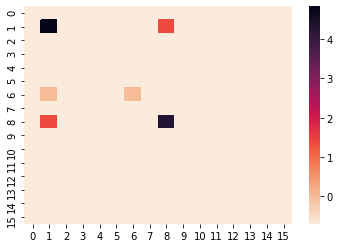

In [76]:
log_comparisons_slashed = []
for t in comparisons_slashed:
    tmp= []
    for u in t:
        if u != 0 :
            tmp.append(log(u))
        else :
            tmp.append(-0.7)
    log_comparisons_slashed.append(tmp)
print(log_comparisons_slashed)
heatmap_types = sb.heatmap(log_comparisons_slashed,cmap = cmap)
fig_types = heatmap_types.get_figure()
fig_types.savefig(type_1 + '_vs_' + type_2 + '.png')

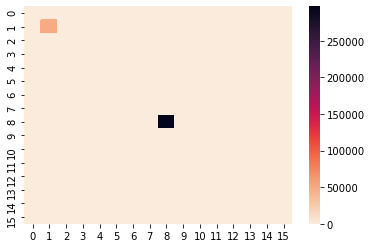

In [79]:
log_comparisons_slashed_nb = []
for t in comparisons_slashed_nb:
    tmp= []
    for u in t:
        if u != 0 :
            tmp.append(log(u))
        else :
            tmp.append(-0.7)
    log_comparisons_slashed_nb.append(tmp)
heatmap_types_nb = sb.heatmap(comparisons_slashed_nb, cmap = cmap)
fig1_types_nb = heatmap_types_nb.get_figure()
fig1_types_nb.savefig(type_1 + "_vs_" + type_2 + '_nb.png')

In [61]:
def index_search(nom, input_list):
    for i in range(len(input_list)):
        if input_list[i].lower() == nom:
            return i